<a href="https://colab.research.google.com/github/superbunny38/MachineLearning/blob/main/CS229MachineLearning/2022AndrewLectureNotes/Probset1/Prob1/Set1Problem1(b).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Libraries
import numpy as np
import pandas as pd
import math
import time
import tqdm as tqdm
import matplotlib.pyplot as plt
import copy
from sklearn.utils import shuffle

**Rights**:

*Assignment made by: Prof. Andrew Ng, Stanford*

 *Assignment solved by: Chaeeun Ryu, SKKU*

# Visualize data

In [2]:
train_df = pd.read_csv('ds1_train.csv')
train_df.head()

,x_1,x_2,y
0,2.911809,60.359613,0.0
1,3.774746,344.149284,0.0
2,2.615488,178.222087,0.0
3,2.013694,15.259472,0.0
4,2.757625,66.194174,0.0


In [3]:
train_df.shape

(800, 3)

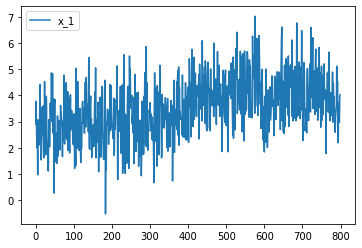

In [4]:
x_ = np.arange(0,train_df.shape[0],1)
plt.plot(x_, train_df['x_1'],label = "x_1")
#plt.plot(x_, train_df['x_2'], label = "x_2")
#plt.plot(x_, train_df['y'], label = "y")
plt.legend()
plt.show()

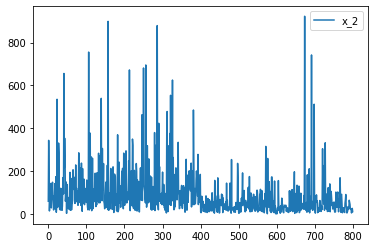

In [5]:
x_ = np.arange(0,train_df.shape[0],1)
#plt.plot(x_, train_df['x_1'],label = "x_1")
plt.plot(x_, train_df['x_2'], label = "x_2")
#plt.plot(x_, train_df['y'], label = "y")
plt.legend()
plt.show()

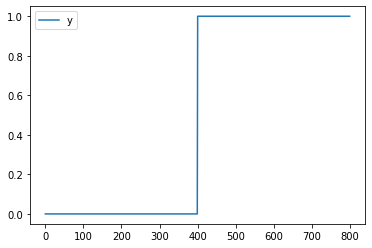

In [6]:
x_ = np.arange(0,train_df.shape[0],1)
#plt.plot(x_, train_df['x_1'],label = "x_1")
#plt.plot(x_, train_df['x_2'], label = "x_2")
plt.plot(x_, train_df['y'], label = "y")
plt.legend()
plt.show()

In [7]:
np.unique(train_df['y'])#binary classification

array([0., 1.])

# (b)

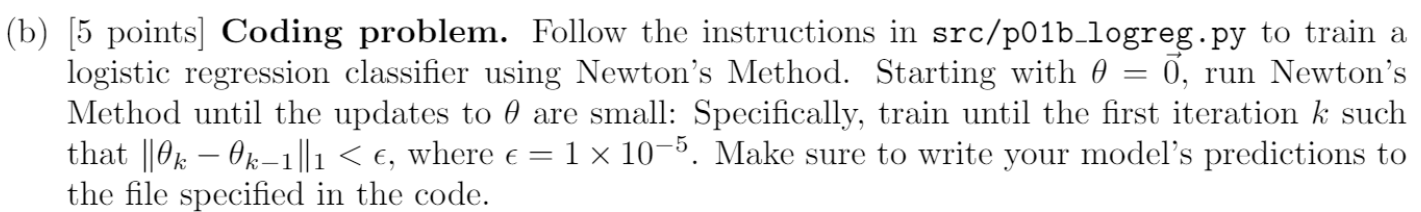

In [8]:
#@title util
import matplotlib.pyplot as plt
import numpy as np


def add_intercept(x):
    """Add intercept to matrix x.

    Args:
        x: 2D NumPy array.

    Returns:
        New matrix same as x with 1's in the 0th column.
    """
    new_x = np.zeros((x.shape[0], x.shape[1] + 1), dtype=x.dtype)
    new_x[:, 0] = 1
    new_x[:, 1:] = x

    return new_x


def load_dataset(csv_path, label_col='y', add_intercept=False):
    """Load dataset from a CSV file.

    Args:
         csv_path: Path to CSV file containing dataset.
         label_col: Name of column to use as labels (should be 'y' or 'l').
         add_intercept: Add an intercept entry to x-values.

    Returns:
        xs: Numpy array of x-values (inputs).
        ys: Numpy array of y-values (labels).
    """

    def add_intercept_fn(x):
        global add_intercept
        return add_intercept(x)

    # Validate label_col argument
    allowed_label_cols = ('y', 't')
    if label_col not in allowed_label_cols:
        raise ValueError('Invalid label_col: {} (expected {})'
                         .format(label_col, allowed_label_cols))

    # Load headers
    with open(csv_path, 'r') as csv_fh:
        headers = csv_fh.readline().strip().split(',')

    # Load features and labels
    x_cols = [i for i in range(len(headers)) if headers[i].startswith('x')]
    l_cols = [i for i in range(len(headers)) if headers[i] == label_col]
    inputs = np.loadtxt(csv_path, delimiter=',', skiprows=1, usecols=x_cols)
    labels = np.loadtxt(csv_path, delimiter=',', skiprows=1, usecols=l_cols)

    if inputs.ndim == 1:
        inputs = np.expand_dims(inputs, -1)

    if add_intercept:
        inputs = add_intercept_fn(inputs)

    return inputs, labels


def plot(x, y, theta, save_path=None, correction=1.0):
    """Plot dataset and fitted logistic regression parameters.
    Args:
        x: Matrix of training examples, one per row.
        y: Vector of labels in {0, 1}.
        theta: Vector of parameters for logistic regression model.
        save_path: Path to save the plot.
        correction: Correction factor to apply (Problem 2(e) only).
    """
    # Plot dataset
    plt.figure()
    plt.plot(x[y == 1, -2], x[y == 1, -1], 'bx', linewidth=2)
    plt.plot(x[y == 0, -2], x[y == 0, -1], 'go', linewidth=2)

    # Plot decision boundary (found by solving for theta^T x = 0)
    margin1 = (max(x[:, -2]) - min(x[:, -2]))*0.2
    margin2 = (max(x[:, -1]) - min(x[:, -1]))*0.2
    x1 = np.arange(min(x[:, -2])-margin1, max(x[:, -2])+margin1, 0.01)
    x2 = -(theta[0] / theta[2] * correction + theta[1] / theta[2] * x1)
    plt.plot(x1, x2, c='red', linewidth=2)
    plt.xlim(x[:, -2].min()-margin1, x[:, -2].max()+margin1)
    plt.ylim(x[:, -1].min()-margin2, x[:, -1].max()+margin2)

    # Add labels and save to disk
    plt.xlabel('x1')
    plt.ylabel('x2')
    if save_path is not None:
        plt.savefig(save_path)

# Sigmoid, Binary Cross Entropy

In [9]:
def sigmoid(theta, x):
  theta_t = np.transpose(theta)
  z = np.dot(theta_t,x)
  result = 1/(1+np.exp(-z))
  return result

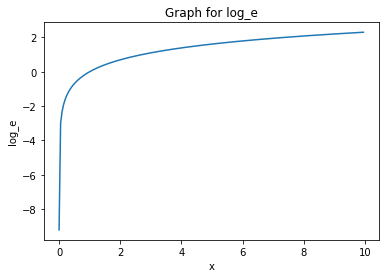

In [10]:
x_ = np.arange(0.0001,10,0.05)
y_ = [math.log(_) for _ in x_]
plt.title("Graph for log_e")
plt.xlabel("x")
plt.ylabel("log_e")
plt.plot(x_,y_)
plt.show()

In the assignment, $ℓ(θ)$ was designed to be log-likelihood.
So maximizing the  $ℓ(θ)$ was the objective.

However, as I defined here  $ℓ(θ)$ to be criterion, and printed out as loss, I multiplied -1 to the log likelihood to represent binary cross entropy loss.

In [11]:
def criterion(h,y):#h: pred, y: actual
  assert len(h) == len(y)
  m = len(h)
  loss = 0.
  for i in range(m):
    loss += -y[i]*math.log(h[i])-(1.-y[i])*math.log(1.-h[i])#BCE
  #print("sum of loss:",loss)
  loss = loss/m
  return loss

In [12]:
def acc(h,y):
  as_labels = []
  for _ in h:
    if _ > 0.5:
      as_labels.append(1.)
    elif _ <= 0.5:
      as_labels.append(0.)
  as_labels, y = np.array(as_labels), np.array(y)
  #print(as_labels)
  return (as_labels == y).sum()/len(as_labels)

In [13]:
y = [0.,0.,0.,1.,1.,1.,1.]
h = [0.9,0.9,0.9,0.1,0.1,0.1,0.9]

In [14]:
acc(h,y)

0.14285714285714285

In [15]:
criterion(h,y)

1.9886958676603002

In [16]:
criterion(h,y)

1.9886958676603002

In [17]:
def check_convergence(previous_theta, new_theta):
  eps=1e-5
  dists = []
  for p, n in zip(previous_theta, new_theta):
    dists.append(abs(p-n))
  diff = np.mean(dists)
  print(f"difference between thetas: {diff}")
  if diff < eps:
    return True
  else:
    return False

# Update rule (Newton's method)

$$θ^{(t+1)} := θ^{(t)} + H^{-1}∇_{θ}ℓ$$

- $H$: Hessian, $∈\mathbb{R}^{(n+1)(n+1)}$
- $∇_{θ}ℓ$: log likelihood for binary classification $∈\mathbb{R}^{(n+1)}$


$H_{ij} = \frac{∂^2ℓ}{∂θ_i∂θ_j}$

In [18]:
#linear model
class LinearModel(object):
    """Base class for linear models."""

    def __init__(self, step_size=0.2, max_iter=100, eps=1e-5,
                 theta_0=[0.,0.,0.], verbose=True):
        """
        Args:
            step_size: Step size for iterative solvers only.
            max_iter: Maximum number of iterations for the solver.
            eps: Threshold for determining convergence.
            theta_0: Initial guess for theta. If None, use the zero vector.
            verbose: Print loss values during training.
        """
        self.theta = theta_0
        self.step_size = step_size
        self.max_iter = max_iter
        self.eps = eps
        self.verbose = verbose

    def fit(self, x, y):
        x,y = shuffle(x,y)
        """Run solver to fit linear model.

        Args:
            x: Training example inputs. Shape (m, n).
            y: Training example labels. Shape (m,).
        """
        assert x.shape[0] ==  y.shape[0]
        

        ###### Find inverse of Hessian
        #derivative of sigmoid
        
        prev_theta = copy.deepcopy(self.theta)
        
        m = x.shape[0]
        Hessians = []
        for j in range(3):
          tmp_H = []
          for k in range(3):
            result_ = 0.
            for i in range(m):
              g = sigmoid(theta = self.theta, x = x[i])
              result_ += g*(1-g)*x[i][j]*x[i][k]
            result_ = result_/m
            tmp_H.append(result_)
          Hessians.append(tmp_H)
        inverse_H = np.linalg.inv(Hessians)
        #print(inverse_H)
        
        ###### Partial derivatives of l(theta) with respect to the theta's
        i,j = 0,0
        partial_d = []#partial d for x_0, x_1, x_2
        for j in range(3):#for all features
          tmp_d = 0. # save partial derivative for each feature
          for i in range(m):
            tmp_d += x[i][j]*(y[i]-sigmoid(theta = self.theta, x = x[i]))
          tmp_d = tmp_d/m
          partial_d.append(tmp_d)
        assert len(partial_d) == x.shape[1]
        #partial_d = np.array(partial_d).reshape(-1,1)
        #print("inverse of Hessian:\n", inverse_H)
        #print("\n\npartial deriv:\n", partial_d)

        update_ = np.matmul(inverse_H, partial_d)

        #calculate loss
        preds = self.predict(x)
        #print("predicted: ",preds[0])
        #print("preds:",preds, "y:",y)
        #print("types:",type(preds), type(y))
        train_loss = criterion(preds, list(y))
        print("train loss: ", train_loss)
        train_acc = acc(preds, list(y))
        print("train acc: ", train_acc)
        #check convergence
        #print("prev:",prev_theta, "new:",update_)
        self.theta = self.theta + update_
        if check_convergence(prev_theta, self.theta) == True:
          print(f"Weights converged. (theta: {self.theta}")
          return True
        return False
        #print(update_)
        #raise NotImplementedError('Subclass of LinearModel must implement fit method.')

    def predict(self, x):
        """Make a prediction given new inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Outputs of shape (m,).
        """
        preds = []
        for sample in x:
          #1/(1+np.exp(-z))
          pred = sigmoid(self.theta, sample)
          preds.append(pred)
        return preds
        #raise NotImplementedError('Subclass of LinearModel must implement predict method.')

In [19]:
#p01b_logreg.py
import numpy as np

def main(train_path = '/content/ds1_train.csv', eval_path = '/content/ds1_valid.csv', pred_path = None):
    """Problem 1(b): Logistic regression with Newton's Method.

    Args:
        train_path: Path to CSV file containing dataset for training.
        eval_path: Path to CSV file containing dataset for evaluation.
        pred_path: Path to save predictions.
    """
    x_train, y_train = load_dataset(train_path, add_intercept=True)
    print(f"train dataset loaded (x with intercept on 0th col: {x_train.shape}, y: {y_train.shape})")
    
    # *** START CODE HERE ***
    print("================Training Starts===========\n")
    clf = LogisticRegression()
    clf.fit(x_train, y_train)
    
    print("==============Validation starts===========")
    x_val, y_val = load_dataset(eval_path, add_intercept=True)
  
    print(f"validation dataset loaded (x with intercept on 0th col: {x_val.shape}, y: {y_val.shape})")
    
    pred_val = clf.predict(x_val)
    val_loss = criterion(pred_val, y_val)
    val_acc = acc(pred_val, y_val)
    count = 0
    print("validation loss:",val_loss)
    print("validation acc:",val_acc)

    # *** END CODE HERE ***
    


class LogisticRegression(LinearModel):
    """Logistic regression with Newton's Method as the solver.

    Example usage:
        > clf = LogisticRegression()
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """
    def __init__(self):
      self.model = LinearModel()

    def fit(self, x, y):
        """Run Newton's Method to minimize J(theta) for logistic regression.

        Args:
            x: Training example inputs. Shape (m, n).
            y: Training example labels. Shape (m,).
        """
      
        # *** START CODE HERE ***
        #model = LinearModel()
        model = self.model
        i = 0
        iter = 10
        while i<iter:#True:
          print(f"epoch: {i}")
          check_conv = model.fit(x,y)
          if check_conv == True:
            break
          i += 1
        # *** END CODE HERE ***

    def predict(self, x):
        """Make a prediction given new inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Outputs of shape (m,).
        """
        # *** START CODE HERE ***
        return self.model.predict(x)
        # *** END CODE HERE ***

In [20]:
main()

train dataset loaded (x with intercept on 0th col: (800, 3), y: (800,))
================Training Starts===========

epoch: 0
train loss:  0.6931471805599426
train acc:  0.5
difference between thetas: 1.4554742786111958
epoch: 1
train loss:  0.4117763837603573
train acc:  0.86625
difference between thetas: 0.7451431202836565
epoch: 2
train loss:  0.3438641842063423
train acc:  0.8725
difference between thetas: 0.49898465555466237
epoch: 3
train loss:  0.3271531900847971
train acc:  0.88125
difference between thetas: 0.19810485359375518
epoch: 4
train loss:  0.32559133608624147
train acc:  0.8825
difference between thetas: 0.024356676690684684
epoch: 5
train loss:  0.32557191492024734
train acc:  0.8825
difference between thetas: 0.00032632789444196966
epoch: 6
train loss:  0.3255719112349646
train acc:  0.8825
difference between thetas: 6.009403669705408e-08
Weights converged. (theta: [-6.26018491  2.47707251 -0.0299125 ]
==============Validation starts===========
validation dataset loa

**Running until 7th iteration would make the weights of the model converge.**

# Visualize the Results

In [29]:
def plot(x, y, theta, save_path=None, correction=1.0, title = ""):
    """Plot dataset and fitted logistic regression parameters.
    Args:
        x: Matrix of training examples, one per row.
        y: Vector of labels in {0, 1}.
        theta: Vector of parameters for logistic regression model.
        save_path: Path to save the plot.
        correction: Correction factor to apply (Problem 2(e) only).
    """
    # Plot dataset
    plt.figure()
    plt.title(title)
    plt.plot(x[y == 1, -2], x[y == 1, -1], 'bx', linewidth=2)
    plt.plot(x[y == 0, -2], x[y == 0, -1], 'go', linewidth=2)

    # Plot decision boundary (found by solving for theta^T x = 0)
    margin1 = (max(x[:, -2]) - min(x[:, -2]))*0.2
    margin2 = (max(x[:, -1]) - min(x[:, -1]))*0.2
    
    x1 = np.arange(min(x[:, -2])-margin1, max(x[:, -2])+margin1, 0.01)
    x2 = -(theta[0] / theta[2] * correction + theta[1] / theta[2] * x1)
    plt.plot(x1, x2, c='red', linewidth=2)
    plt.xlim(x[:, -2].min()-margin1, x[:, -2].max()+margin1)
    plt.ylim(x[:, -1].min()-margin2, x[:, -1].max()+margin2)

    # Add labels and save to disk
    plt.xlabel('x1')
    plt.ylabel('x2')
    if save_path is not None:
        plt.savefig(save_path)

In [30]:
theta = [-6.26018491,  2.47707251, -0.0299125 ]

In [23]:
train_path = '/content/ds1_train.csv'
eval_path = '/content/ds1_valid.csv'

In [24]:
x_train, y_train = load_dataset(train_path, add_intercept=True)
x_val, y_val = load_dataset(eval_path, add_intercept=True)

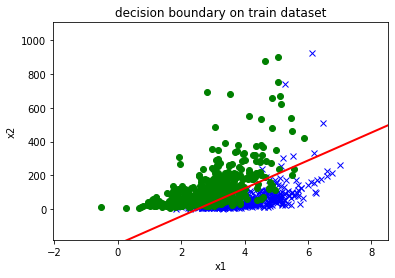

In [31]:
plot(x_train, y_train, theta, title = "decision boundary on train dataset")

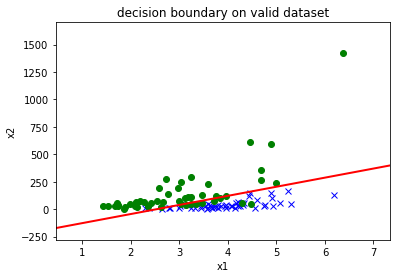

In [32]:
plot(x_val, y_val, theta, title = "decision boundary on valid dataset")